<a href="https://colab.research.google.com/github/rajeev-gautam/Project04---GDP-Analysis/blob/main/Project04_GDP_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 04 - GDP ANALYSIS**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("gdp.csv")

In [16]:
df.shape

(11507, 4)

In [17]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


# **Check Description of Each Column**

In [18]:
df['Country Name'].describe()

,Country Name
count,11507
unique,256
top,Caribbean small states
freq,57


In [19]:
df['Country Code'].describe()

,Country Code
count,11507
unique,256
top,CSS
freq,57


In [20]:
df['Year'].min()

1960

In [21]:
df['Year'].max()

2016

# **How many unique Countries Data we're having in the dataset?**

In [22]:
df["Country Name"].nunique()

256

# **How many years of Data we're having for India**

In [23]:
df_india = df[df["Country Name"] == "India"]
df_india.head()

,Country Name,Country Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10


In [24]:
df_india['Year'].nunique()

57

# **Whats the world GDP in 1969?**

In [25]:
df_1969 = df[df["Year"] == 1969]
df_1969.head()

,Country Name,Country Code,Year,Value
1,Arab World,ARB,1969,2.843420e+10
58,Caribbean small states,CSS,1969,3.563688e+09
142,Early-demographic dividend,EAR,1969,2.633785e+11
199,East Asia & Pacific,EAS,1969,3.461594e+11
256,East Asia & Pacific (excluding high income),EAP,1969,1.142179e+11


In [26]:
df_1969["Value"].sum()

np.float64(19577201579296.54)

# **Whats the % of GDP growth of India in Year 1994 (as compare to 1993)?**

In [27]:
gdp_1993 = df_india[df_india['Year'] == 1993]['Value'].values[0]
gdp_1994 = df_india[df_india['Year'] == 1994]['Value'].values[0]
gp = ((gdp_1994 - gdp_1993) / gdp_1993) * 100
gp

np.float64(17.178748210146075)

# **GDP Growth of India from 1960 - 2016**

In [28]:
gdp_1960 = df_india[df_india['Year'] == 1960]['Value'].values[0]
gdp_2016 = df_india[df_india['Year'] == 2016]['Value'].values[0]
absolute_growth = gdp_2016 - gdp_1960
percent_growth = (absolute_growth / gdp_1960) * 100
absolute_growth, percent_growth

(np.float64(2227256574311.085), np.float64(6096.072762594173))

# **Create a new columns named as GDP which shows the GDP growth of each country for that year**

In [29]:
df = df.sort_values(by=['Country Name', 'Year'])
df['GDP'] = df.groupby('Country Name')['Value'].pct_change() * 100

In [30]:
df.head()

,Country Name,Country Code,Year,Value,GDP
2306,Afghanistan,AFG,1960,5.377778e+08,NaN
2307,Afghanistan,AFG,1961,5.488889e+08,2.066111
2308,Afghanistan,AFG,1962,5.466667e+08,-0.404857
2309,Afghanistan,AFG,1963,7.511112e+08,37.398386
2310,Afghanistan,AFG,1964,8.000000e+08,6.508870


# **Analysing Arab World**

---



In [31]:
df_pr = df[df['Country Name'] == 'Arab World']

<Axes: xlabel='YEARS', ylabel='GDP'>

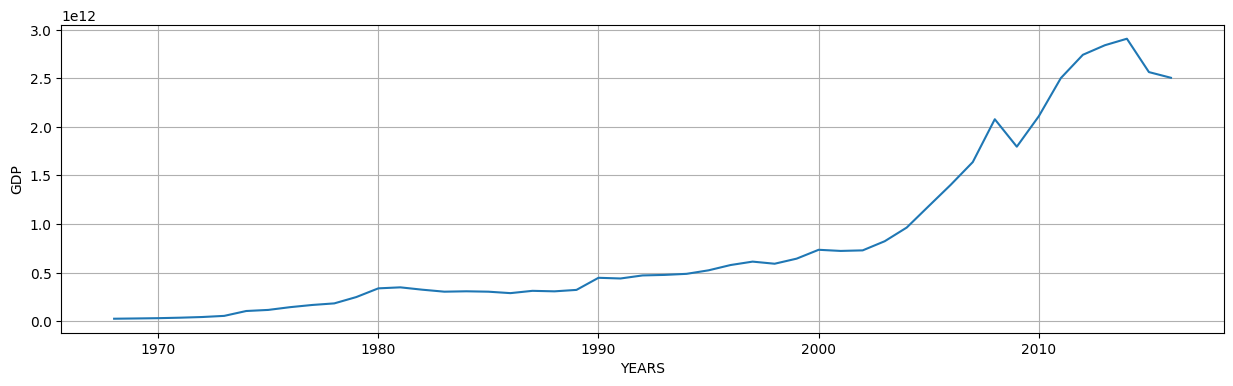

In [32]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,4),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')

# **Finding GDP Growth of Arab**

In [33]:
data = df_pr.values

gdp_change = [0]

for i in range(1,len(data)):

    prev = data[i-1][3]
    cur = data[i][3]

    gdp_change.append(round(((cur - prev) / prev)*100,2))

In [34]:
df_pr.assign(GDP = gdp_change)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


# **Finding GDP Growth of Every country**

In [35]:
final_data = []

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [36]:
df = pd.concat(final_data, axis = 0)

In [37]:
df.head()

,Country Name,Country Code,Year,Value,GDP
2306,Afghanistan,AFG,1960,5.377778e+08,0.00
2307,Afghanistan,AFG,1961,5.488889e+08,2.07
2308,Afghanistan,AFG,1962,5.466667e+08,-0.40
2309,Afghanistan,AFG,1963,7.511112e+08,37.40
2310,Afghanistan,AFG,1964,8.000000e+08,6.51


In [38]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

,Value
Country Name,
World,7.904923e+13
High income,5.036240e+13
OECD members,4.937008e+13
Post-demographic dividend,4.673504e+13
IDA & IBRD total,2.948247e+13
Low & middle income,2.870476e+13
Middle income,2.829277e+13
IBRD only,2.739661e+13
Europe & Central Asia,2.365470e+13


# **Using Plotty for Graphs:**



In [39]:
import plotly.express as px
import plotly.offline as pyo

In [43]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis (1960-2016)')

fig

In [42]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis (1960-2016)')
fig

In [44]:
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis', range_y = [0, 4000000000000])

fig

# **GDP of Each Country**

In [45]:
import os

In [46]:
os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)

# **GDP of Each Country With Respect To 80T**

In [47]:
os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():

    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

# **GDP of all Countries**

In [48]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'Countries GDP.html')

'Countries GDP.html'

# **GDP Comparison between India & China**

In [49]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

In [50]:
df_pr = pd.concat([c1,c2],axis = 0)

In [51]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')
pyo.plot(fig, filename = 'IND|CHN.html')

'IND|CHN.html'

# **GDP Comparison between Specific Countries Using a function**

In [54]:
def compare_gdp(lst, isOpen):

    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)

    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst),
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)

In [55]:
compare_gdp(['IND','USA'], False)

# **NGDP Growth Comparison between Specific Countries**

In [61]:
def compare_gdp(lst, isOpen):

    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst),
                  color = 'Country Name')
    fig.show()

In [62]:
compare_gdp(['IND','USA','ITA','CHN'], True)

# **GDP Growth Comparies of All the Countries**

In [58]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
fig

# **GDP Growth of All Countries Graph Individual**

In [63]:
os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

# **GDP Growth between 1960 - 2016**

In [64]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]

    if (len(df_pr) == 57):
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis = 0)

In [65]:
df_pr

,Country Name,Country Code,Year,Value,GDP
2377,Algeria,DZA,1960,2.723649e+09,0.00
2378,Algeria,DZA,1961,2.434777e+09,-10.61
2379,Algeria,DZA,1962,2.001469e+09,-17.80
2380,Algeria,DZA,1963,2.703015e+09,35.05
2381,Algeria,DZA,1964,2.909352e+09,7.63
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [66]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')
fig